<a href="https://colab.research.google.com/github/anacarolRicciardi/Data_Governance/blob/main/privacy_preserving_ml_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Privacy-Preserving Data Collection: Randomized Response and Frequency Estimation with Machine Learning


## Introduction

In privacy-preserving data collection, we aim to gather **useful insights** from individuals while protecting their **sensitive information**.
This notebook explores **two core techniques** in privacy-preserving statistics:

1. **Randomized Response** - A technique to collect truthful yet anonymous survey responses.
2. **Frequency Estimation** - A method to estimate the frequency of items in a dataset without compromising privacy.

Additionally, we will apply **Machine Learning (ML)** to analyze the effectiveness of these techniques.
We will implement a **basic neural network model from scratch** using NumPy.

We will generate **synthetic datasets** to demonstrate these methods in a clear and structured manner.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Set seed for reproducibility
random.seed(42)
np.random.seed(42)


## Randomized Response

Actual 'Yes' Rate: 0.32
Estimated 'Yes' Rate using Randomized Response: 0.32


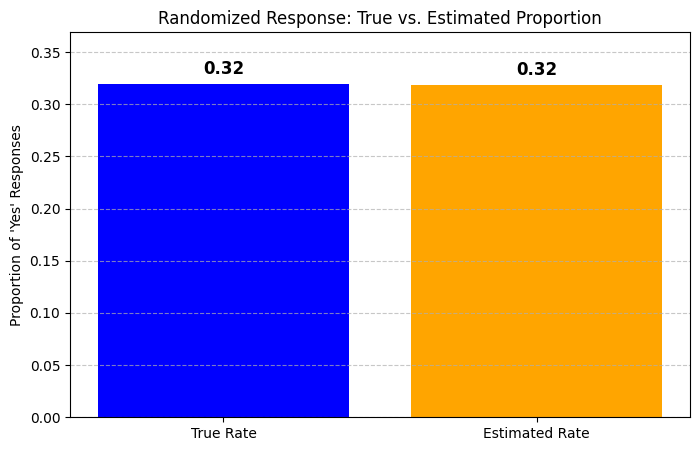

In [2]:

# Simulating a survey question: "Have you ever cheated on a test?"

num_participants = 1000
true_answers = np.random.choice([1, 0], size=num_participants, p=[0.3, 0.7])  # 30% say Yes, 70% say No

# Probability of answering truthfully
p = 0.7

# Randomized response mechanism
def randomized_response(answer, p):
    if np.random.rand() < p:
        return answer  # Answer truthfully with probability p
    else:
        return np.random.choice([1, 0])  # Answer randomly with probability 1-p

# Apply randomized response
reported_answers = np.array([randomized_response(ans, p) for ans in true_answers])

# Estimating the true proportion
estimated_yes_rate = (np.mean(reported_answers) - (1 - p) / 2) / p

# Display the results
print(f"Actual 'Yes' Rate: {np.mean(true_answers):.2f}")
print(f"Estimated 'Yes' Rate using Randomized Response: {estimated_yes_rate:.2f}")

# Improved Plot for better visualization
plt.figure(figsize=(8, 5))
plt.bar(["True Rate", "Estimated Rate"], [np.mean(true_answers), estimated_yes_rate], color=["blue", "orange"])
plt.ylabel("Proportion of 'Yes' Responses")
plt.title("Randomized Response: True vs. Estimated Proportion")
plt.ylim(0, max(np.mean(true_answers), estimated_yes_rate) + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate([np.mean(true_answers), estimated_yes_rate]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12, fontweight='bold')
plt.show()


## Neural Network for Predicting True Answers

In [3]:

# Define a simple neural network
class SimpleNeuralNetwork:
    def __init__(self):
        self.weights = np.random.rand(1, 1)
        self.bias = np.random.rand(1, 1)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, X, y, epochs=1000, lr=0.1):
        for _ in range(epochs):
            linear_output = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_output)
            error = y - predictions
            adjustments = error * self.sigmoid_derivative(predictions)
            self.weights += lr * np.dot(X.T, adjustments)
            self.bias += lr * np.sum(adjustments, axis=0, keepdims=True)

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias) > 0.5

# Prepare data for training
X = reported_answers.reshape(-1, 1)
y = true_answers.reshape(-1, 1)

# Train neural network
nn = SimpleNeuralNetwork()
nn.train(X, y)
predictions = nn.predict(X).astype(int)

# Evaluate model
accuracy = np.mean(predictions == y)
print(f"Neural Network Accuracy: {accuracy:.2f}")


Neural Network Accuracy: 0.84


## Frequency Estimation

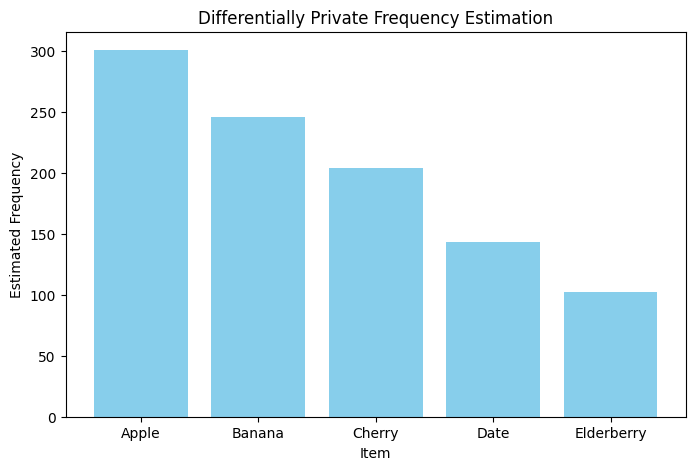

,Item,Noisy Frequency
0,Apple,300.463457
1,Banana,245.881035
2,Cherry,203.872487
3,Date,143.492655
4,Elderberry,102.005276


In [4]:

# Simulating a dataset of user choices (e.g., favorite fruit)
items = ["Apple", "Banana", "Cherry", "Date", "Elderberry"]
num_responses = 1000

# Generate synthetic responses
true_frequencies = np.random.choice(items, size=num_responses, p=[0.3, 0.25, 0.2, 0.15, 0.1])

# Differentially private frequency estimation using Laplace noise
def noisy_frequency_count(choices, epsilon=1.0):
    unique, counts = np.unique(choices, return_counts=True)
    noisy_counts = counts + np.random.laplace(0, 1/epsilon, size=len(counts))
    return dict(zip(unique, noisy_counts))

# Apply frequency estimation
noisy_counts = noisy_frequency_count(true_frequencies, epsilon=1.0)

# Convert to DataFrame for visualization
freq_df = pd.DataFrame(list(noisy_counts.items()), columns=["Item", "Noisy Frequency"])

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(freq_df["Item"], freq_df["Noisy Frequency"], color="skyblue")
plt.xlabel("Item")
plt.ylabel("Estimated Frequency")
plt.title("Differentially Private Frequency Estimation")
plt.show()

# Display estimated frequencies
freq_df



## Conclusion

In this notebook, we explored **two privacy-preserving data collection techniques**:

1. **Randomized Response**: A method that allows truthful yet private survey responses.
2. **Frequency Estimation**: A technique that estimates item frequencies while preserving privacy.
3. **Neural Network Analysis**: We implemented a basic **Neural Network** from scratch to predict true responses from noisy responses, evaluating privacy loss.

These methods are fundamental in **differential privacy** and allow researchers to collect useful data **without compromising individual privacy**.

Understanding these techniques is essential for designing **privacy-aware surveys and analytics systems**.

Thank you for following along! 🚀
